## Final Project Submission

Please fill out:
* Student name: Filiz Camuz
* Student pace: Self Paced 
* Scheduled project review date/time: end of June
* Instructor name: Eli
* Blog post URL: 


# Title

dgsdfsd
sdgfsdkgfs
sdjfskdf



##OSEMN Process¶
#Obtain

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem.

#Scrub

During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.

#Explore

This step focuses on getting to know the dataset you're working with. This step tends to blend with the Scrub step mentioned above. During this step, you'll create visualizations to really get a feel for your dataset. You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that. At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.

#Model

This step consists of building and tuning models using all the tools you have in your data science toolbox. In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results. As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like Scrub or Explore, and make some changes to see how it affects the model.

#Interpret

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders. As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data. That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.


###Obtain

The requiremen for this project is to come up with a model to predict house price in Kings County.  area. The Kings County Housing Data dataset was given to solve this problem. Now I will import the necessary libraries and the dataset to explore. 


In [420]:
#import all necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='whitegrid')

# Modeling, Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

# Feature Selection
from sklearn.feature_selection import RFE
# Scaler
from sklearn.preprocessing import MinMaxScaler


In [421]:
# Loading data into pandas DataFrame
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


There are 21 rows, I can not see all the column names. I will paste the column descriptions below. 

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** - Price  is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number  of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** -  square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15**- The square footage of the land lots of the nearest 15 neighbors



Some column names are not well described (view, sqrft_living15, sqrft_lot15).  

In [422]:
df.shape

(21597, 21)

In [423]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [425]:
# Data types are numeric and string. 

# Data Scrubbing

First thing I will check is the null values: I will use .isna() for that purpose. Before that, I will delete the id column which I do not need this feature for this project. 

In [426]:
df.drop(['id'], axis=1, inplace=True)

In [427]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The view feature has only 63 missing value, however, waterfront has 2376, and yr_renovated has 3842 null values out of 21597 observations. I will check each one of them individually to see what I can do for those missing values.     

## Null values

### view & waterfront

In [428]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

I have checked the unique values; there are values like 0,1,2,3,4. I first assumed these are the number of times this house was viewed by buyers before a purchase.However it sounds a bit odd to buy a house without viewing at least once. So the other option would be some sort of appealing view is available for this house. Although there is one feature as "waterfront", this could be a general clolumn identifying the houses has some special views  such as forest, city..etc I woudl like to check if there is such relationship between waterfron and view in that term.    

I want to first check if all view values are different than 0 for all of the waterfront values are 1. 


In [429]:
df.view[df['waterfront']==1].value_counts()

4.0    123
3.0     14
2.0      7
1.0      1
Name: view, dtype: int64

In [430]:
df.waterfront[df['view']==0].value_counts()

0.0    17312
Name: waterfront, dtype: int64

There is no 0 in the view when waterfront is 1 and waterfron is always 0 when view is 0 except null values. I can use this information for filling out some of the null values. 
Beacuse it means that when view is 0 then null values in waterfront should be replaced with 0. 

In [431]:
df.waterfront[df['view']==0]=0

/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [432]:
df.waterfront.isna().sum()

266

This took care of most of the missing values in waterfront. Rest of them is unknown. Lets see how the values are distributed.

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


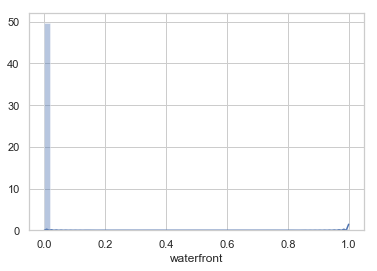

In [433]:
sns.distplot( df[df.waterfront.notna()]['waterfront'] )

The number of 1 values are comparingly too small so I have used distplot to visualise. It wOuld not hurt the convert rest of the null values in to 0 because it would not do any dramatic effect on the result and I can still keep the rest of the data for the other features in those rows.  

In [434]:
df.waterfront=df.waterfront.fillna(0)


Now let's see how the view distirbuted. 

# of missing values in the view column 63


Text(0,0.5,'# of Houses')

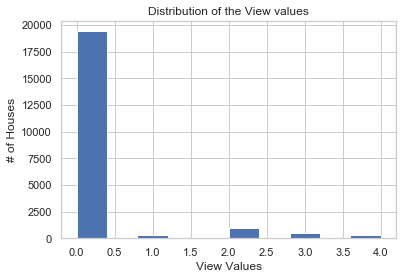

In [435]:
print("# of missing values in the view column", df.view.isna().sum())

df.view.hist()
plt.title("Distribution of the View values")
plt.xlabel("View Values")
plt.ylabel("# of Houses")

Missing values in the view is also small number and the value of "0" is vrey large. I can replace all nul values with "0".

In [436]:
df.view=df.view.fillna(0)
df.view.isna().sum()

0

## yr_renovated

In [437]:
df.yr_renovated.unique()



array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

I would like to cross check this feature and date feature. Because there is already a yr_built for year. So what about date? 


In [438]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Text(0,0.5,'Number of Renovated House')

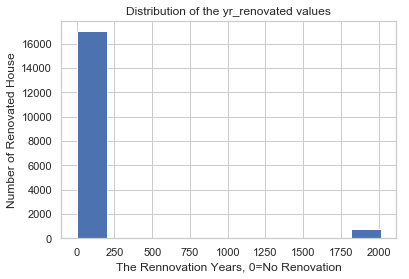

In [439]:
df.yr_renovated.hist()
plt.title("Distribution of the yr_renovated values")
plt.xlabel("The Rennovation Years, 0=No Renovation")
plt.ylabel("Number of Renovated House")

When I compare the values in the same rows, it seems no connection. the date is probably the last date that the house was sold. No luck on yr_renovation. So, since there is no information about renovation for nan values, I will just fill them with "0". Also, the number of renovated house are so small. I was planning to bin those years but, since the number is very small, it will be better to convert this column as renovated or non-renovated. 

In [440]:
df.yr_renovated=df.yr_renovated.fillna(0)
df.yr_renovated[df.yr_renovated!=0]=1
df.yr_renovated.value_counts()


/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

So far , I took care of all null values in the dataset. Now let me check if there is any place holders. 


## Place holders

I have checked all features' unique values and value counts. There is only one placeholder in sqft_basement. It is the "?". Since it is not a number.I have noticed that sqft_basement feature is object type. I wanted to convert it to float, but because of a string value ("?"), it did not let me to do. To be able replace ? with any number, I need to convert them to NaN. Because that is a value both str and onject category can recognize.

In [441]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [442]:
df.sqft_basement[df.sqft_basement=='?'].count()

454

In [443]:
df['sqft_basement'] = np.where(
    df.sqft_basement.eq('?'), np.NaN, df['sqft_basement'] .str[:-1]
)

In [444]:
df.sqft_basement=df.sqft_basement.astype('float')

My first intention was filling NaN with the mean of this column, however, I wanted to see if there is any  relationship between 'sqft_basement', 'sqft_above', 'sqft_living' features. What I have noticed is sqft_basement is the difference between other two features. So I will replace all sqrt_basement column with this calculation. 

In [445]:
df[['sqft_basement', 'sqft_above', 'sqft_living']].head()

,sqft_basement,sqft_above,sqft_living
0,0.0,1180,1180
1,400.0,2170,2570
2,0.0,770,770
3,910.0,1050,1960
4,0.0,1680,1680


In [446]:
df['sqft_basement'] = df [ 'sqft_living']- df['sqft_above']

In [447]:
df.sqft_basement.value_counts().head()

0      13110
600      221
700      218
500      214
800      206
Name: sqft_basement, dtype: int64

# Exploration

In [448]:
df['date'] = pd.to_datetime(df['date'])

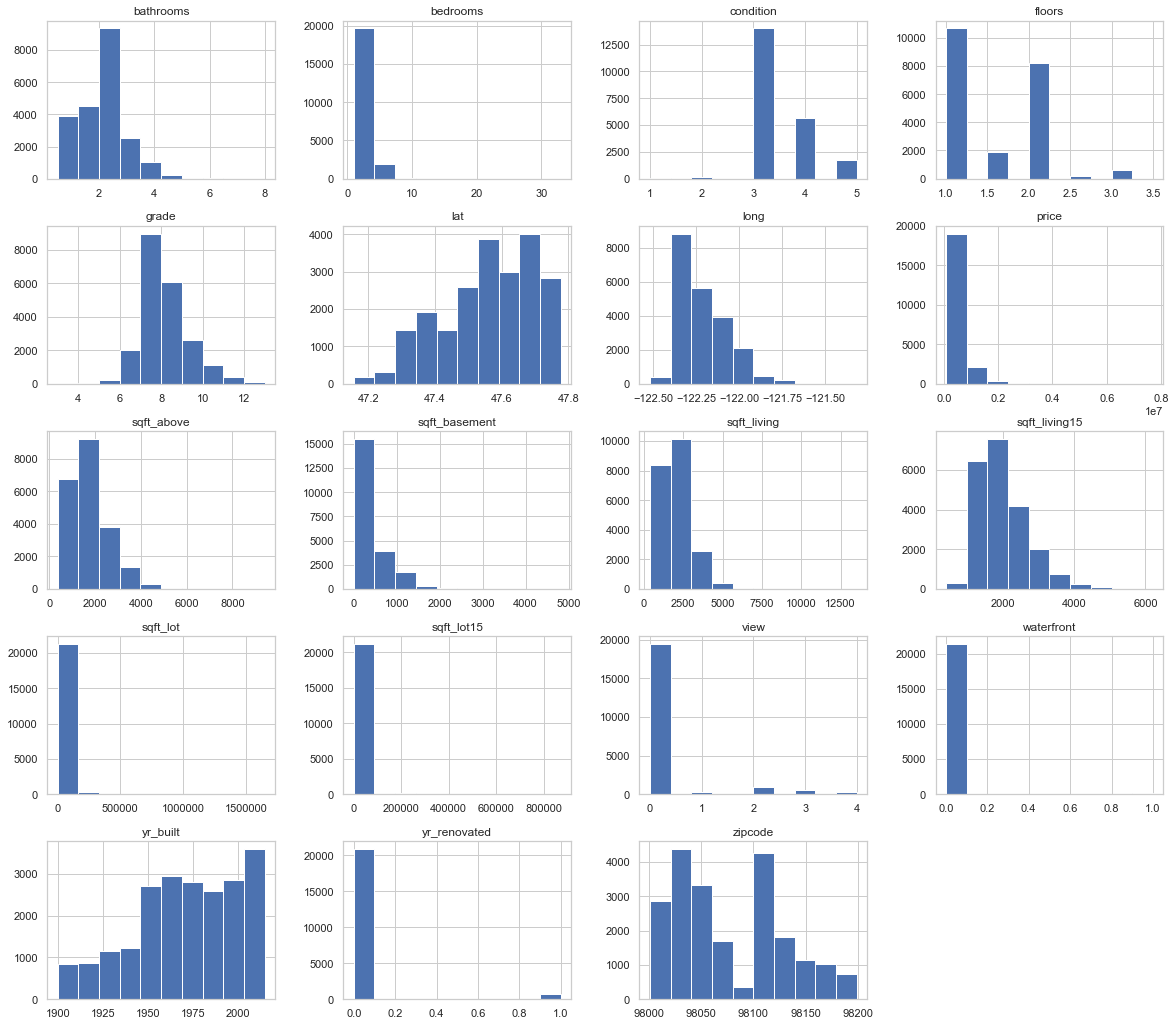

In [449]:
df.hist(figsize = (20,18));

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


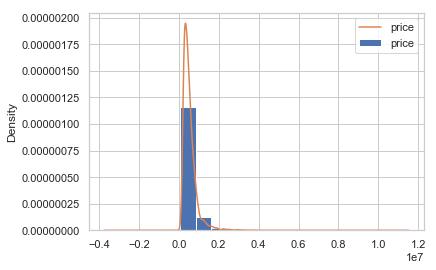

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


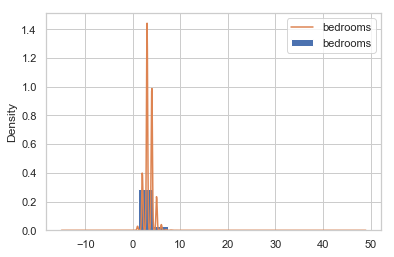

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


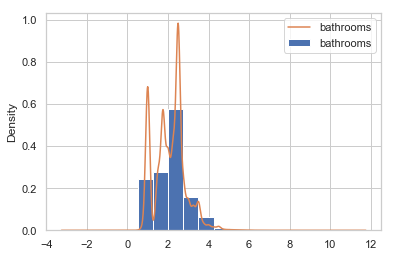

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


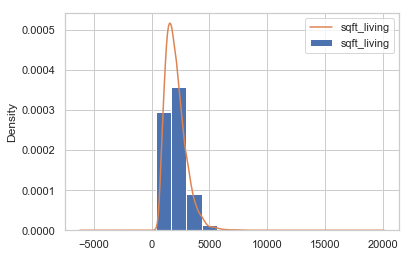

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


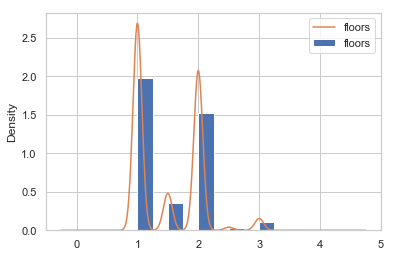

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


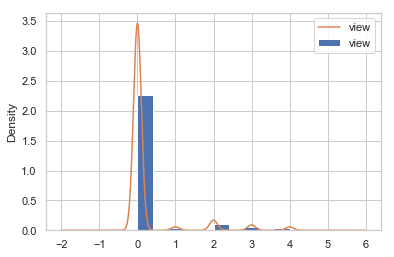

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


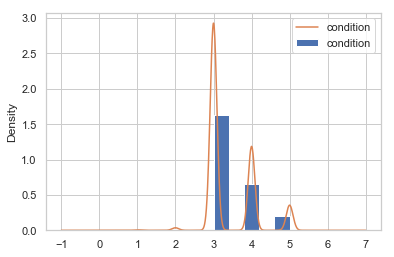

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


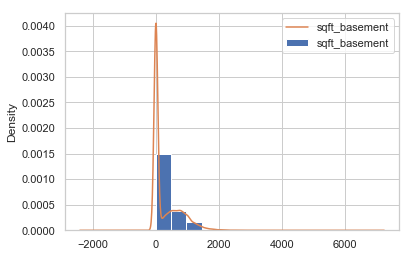

/Users/kaan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


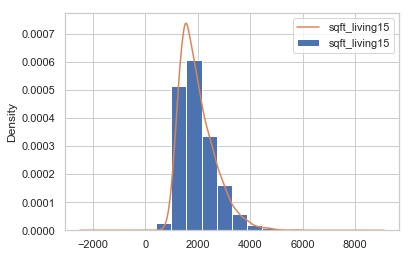

In [450]:
cols=['price', 'bedrooms', 'bathrooms', 'sqft_living', 
       'floors', 'view', 'condition', 'sqft_basement',
        'sqft_living15']
for i in cols:
    df[i].plot.hist(normed=True )
    df[i].plot.kde(label=i )
    plt.legend()
    plt.show()

In [452]:
df=df.drop('date', axis=1)

## Correlation

Before I start label encoding I want to check correlation matrix to see if there is any column that I need to drop.  

In [453]:
"""# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns

 
# with regression
sns.pairplot(df, kind="reg")
plt.show()
 
# without regression
sns.pairplot(df, kind="scatter")
plot.show()"""


'# library & dataset\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n \n# with regression\nsns.pairplot(df, kind="reg")\nplt.show()\n \n# without regression\nsns.pairplot(df, kind="scatter")\nplot.show()'

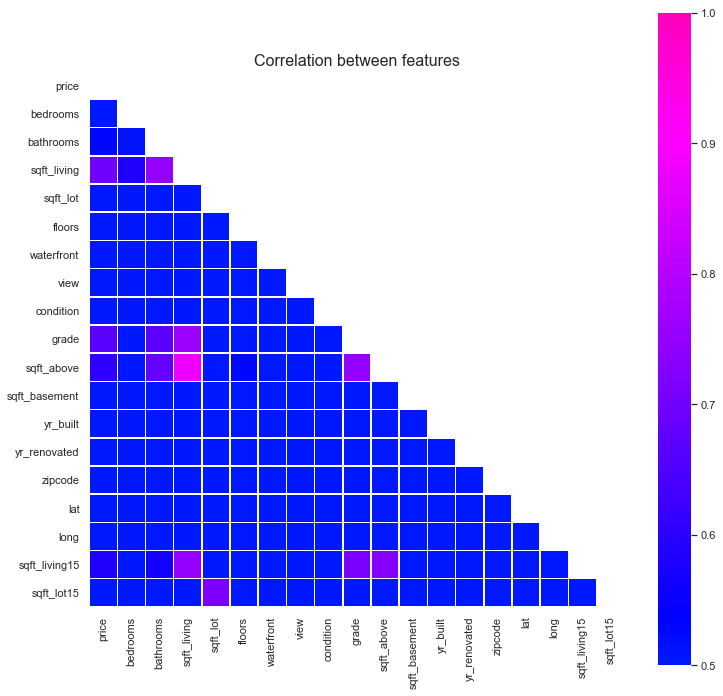

In [454]:
plt.figure(figsize=(12,12))
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0, vmin=0.5, square=True, linewidths=.5, cmap='gist_rainbow')
plt.title('Correlation between features', fontdict={'fontsize': 16})
plt.show()

There is strong correlation between  sqft_above and sqft_living. I will drop sqft_above because sqft_living might be more handy for further analysis

In [455]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


In [456]:
df=df.drop('sqft_above', axis=1)
df=df.drop('grade', axis=1)


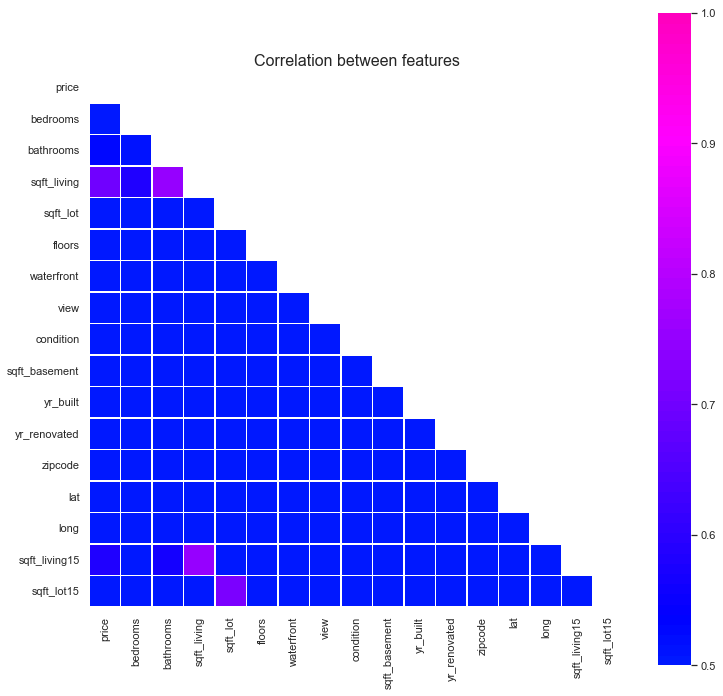

In [457]:
plt.figure(figsize=(12,12))
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0, vmin=0.5, square=True, linewidths=.5, cmap='gist_rainbow')
plt.title('Correlation between features', fontdict={'fontsize': 16})
plt.show()

## Outliers

I would like to check the outliers for all features that has continues values and some with discrete values. The best plot for outliers is boxplot.

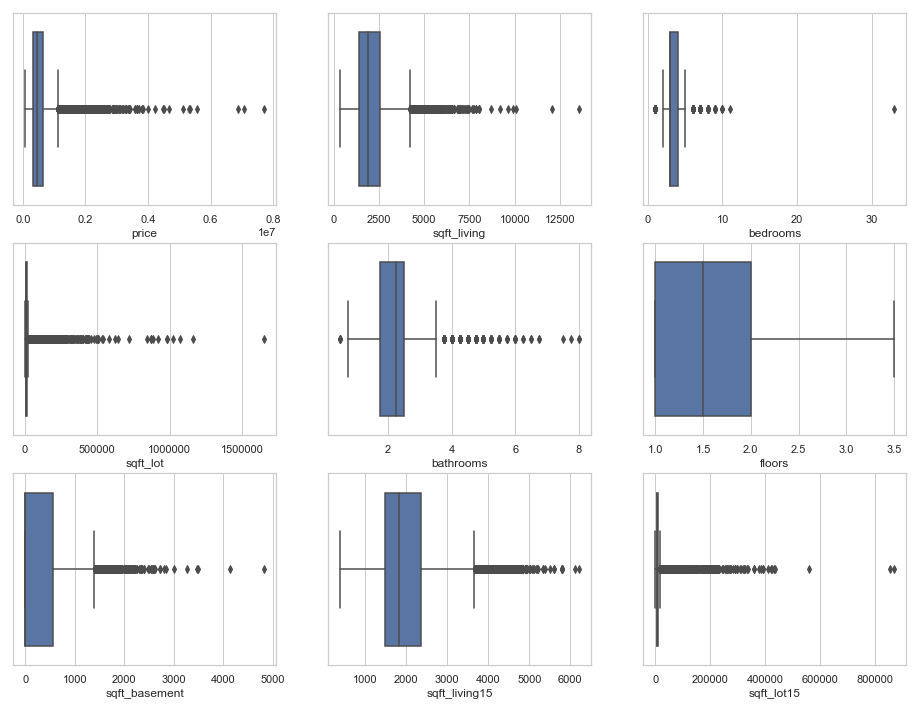

In [458]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.sqft_living)
plt.subplot(333)
sns.boxplot(df.bedrooms)
plt.subplot(334)
sns.boxplot(df.sqft_lot)
plt.subplot(335)
sns.boxplot(df.bathrooms)
plt.subplot(336)
sns.boxplot(df.floors)
plt.subplot(337)
sns.boxplot(df.sqft_basement)
plt.subplot(338)
sns.boxplot(df.sqft_living15)
plt.subplot(339)
sns.boxplot(df.sqft_lot15)


In [459]:
# Eliminating some extreme outliers from the columns 
df= df[(df['price'] <= 400000)]
df= df[(df['sqft_living'] <= 8000)]
df= df[(df['bedrooms'] <= 6)]
df= df[(df['sqft_lot'] <= 300000)]
df= df[(df['bathrooms'] <= 4)]
df= df[(df['sqft_basement'] <= 2500)]
df= df[(df['sqft_living15'] <= 5500)]
df= df[(df['sqft_lot15'] <= 250000)]

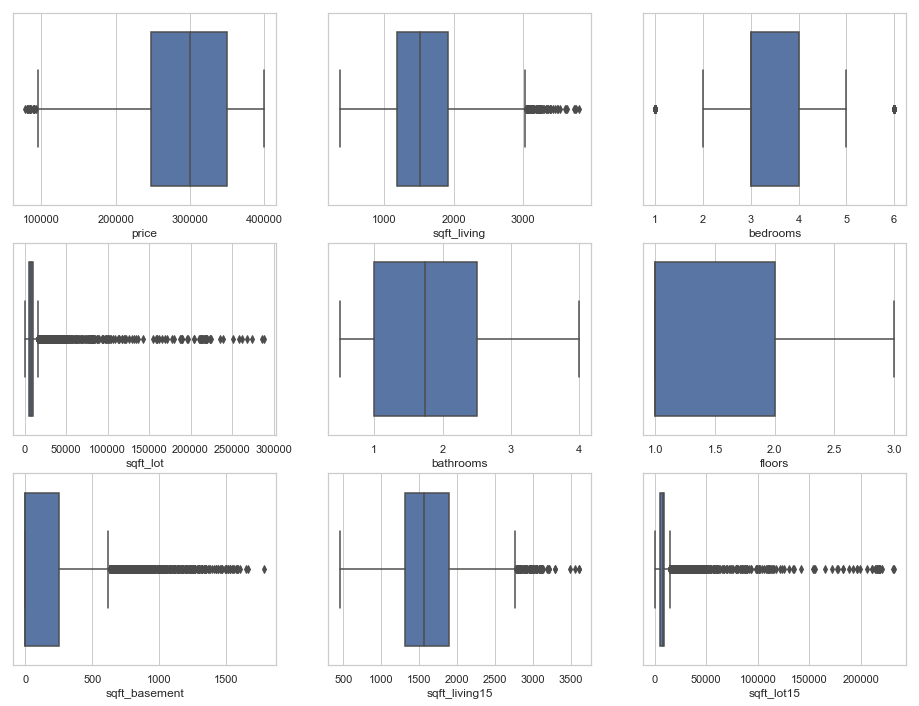

In [460]:
# Lets check the plots again
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.sqft_living)
plt.subplot(333)
sns.boxplot(df.bedrooms)
plt.subplot(334)
sns.boxplot(df.sqft_lot)
plt.subplot(335)
sns.boxplot(df.bathrooms)
plt.subplot(336)
sns.boxplot(df.floors)
plt.subplot(337)
sns.boxplot(df.sqft_basement)
plt.subplot(338)
sns.boxplot(df.sqft_living15)
plt.subplot(339)
sns.boxplot(df.sqft_lot15)

Most of them improved but sqft_lot and sqft_lot15 are still skewed very bad. I will come back to thoese in scaling part.   

## Data Types

### Converting date to datatime type

In [462]:

#df['date'] = pd.to_datetime(df['date'])

### Binning ( yr_built,  zipcode, lat, long  )

In [463]:
#Binning yr_built
df.yr_built.describe()

count    8793.000000
mean     1969.884567
std        26.188570
min      1900.000000
25%      1953.000000
50%      1969.000000
75%      1990.000000
max      2015.000000
Name: yr_built, dtype: float64

In [464]:
built_bins=[1900,1930,1960,1990,2020]
bins_built= pd.cut(df['yr_built'], built_bins)
bins_built = bins_built.cat.as_unordered()
df.yr_built=bins_built

In [465]:
#Binning zipcode
df.zipcode.describe()

count     8793.000000
mean     98078.821449
std         57.951061
min      98001.000000
25%      98031.000000
50%      98058.000000
75%      98126.000000
max      98199.000000
Name: zipcode, dtype: float64

 There are total 72 uniques zipcode values. The range is 98001-98199. I will put them in to 5 bins.


In [466]:
zipbins=[98000,98040,98080,98120,98160,98200]
binned_zip=pd.cut(df.zipcode, zipbins)
df.zipcode=binned_zip


In [467]:
#Binning long
segments = 10
bins = list(np.linspace(df.long.min(), df.long.max(), num=segments))
labels = [i for i in range(1,segments)]
df.long = pd.cut(df.long, bins, labels=labels)


In [468]:
#Binning lat
segments = 10
bins = list(np.linspace(df.lat.min(), df.lat.max(), num=segments))
bins
labels = [i for i in range(1,segments)]
df.lat = pd.cut(df.lat, bins, labels=labels)
 

### Category Types

I will convert nine features to category type. I will put them in to a list and do this task in a loop. 

In [469]:
cat_list=['yr_built','condition','zipcode','long','lat','waterfront','floors','view', 'bedrooms','bathrooms']

In [470]:
for i in cat_list:
    df[i]=df[i].astype('category')
    df[i]=df[i].cat.codes

### One-Hot-Encoding

Usin gthe same list, i will create dummies, add them to the dataframe and drop the original column.

In [471]:
for i in cat_list:
    dummies=pd.get_dummies(df[i],prefix=i, drop_first=True)
    df=df.join(dummies)
    df.drop([i], axis=1, inplace=True)


In [472]:
#check if everything looks ok.
#df.info()
df.head()

,price,sqft_living,sqft_lot,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,yr_built_0,yr_built_1,yr_built_2,...,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,bathrooms_9,bathrooms_10,bathrooms_11,bathrooms_12,bathrooms_13,bathrooms_14
0,221900.0,1180,5650,0,0.0,1340,5650,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,770,10000,0,0.0,2720,8062,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,1715,6819,0,0.0,2238,6819,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,291850.0,1060,9711,0,0.0,1650,9711,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,229500.0,1780,7470,730,0.0,1780,8113,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling & Normalization

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


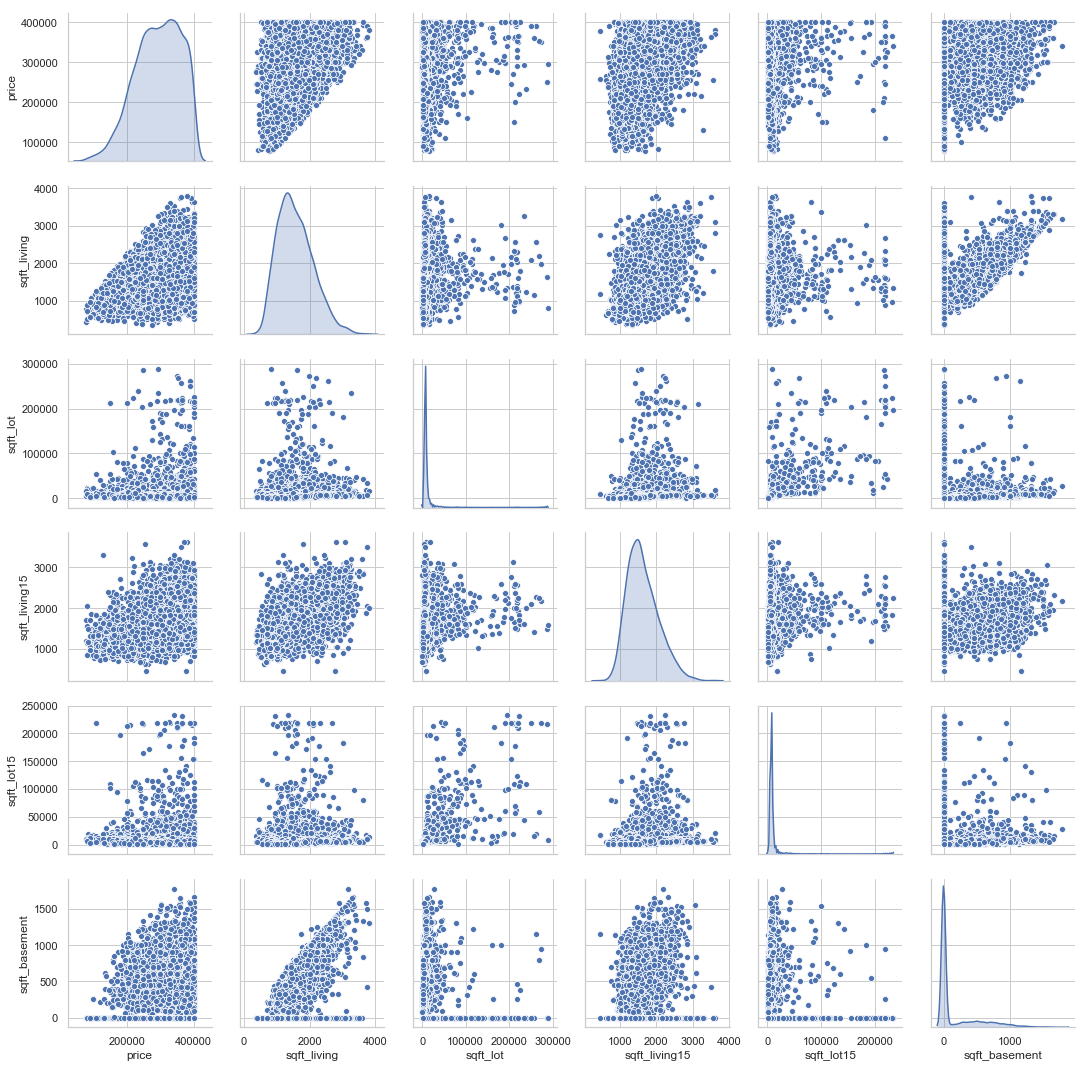

In [473]:
df_cont=df.loc[:,['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_basement']]
g = sns.pairplot(df_cont, diag_kind="kde")

### Skewed features
I will use log transformation for sqft_basement, sgft_lot and sqft_lot15 to try to fix their  skewness. 

/Users/kaan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


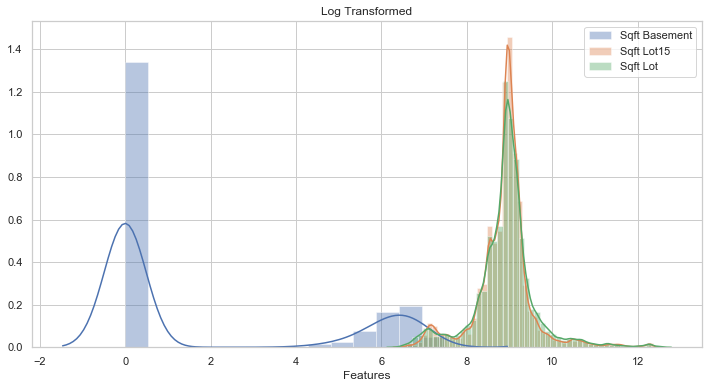

In [474]:
sqft_basement = np.log(df.sqft_basement+1)
sqft_lot15 = np.log(df.sqft_lot15)
sqft_lot = np.log(df.sqft_lot)
sqft_living = np.log(df.sqft_living)
sqft_living15 = np.log(df.sqft_living15)
price=np.log(df.price)

# Display
plt.figure(figsize=(12,6))
sns.distplot(sqft_basement, label='Sqft Basement')
sns.distplot(sqft_lot15, label='Sqft Lot15')
sns.distplot(sqft_lot, label='Sqft Lot')

plt.title('Log Transformed', )
plt.xlabel('Features')
plt.legend()
plt.show()


Skewness is not cured for basement but the other two features are much better. Now I will skale all continues  variables with min-max scaling. 

### Min Mix Scaling

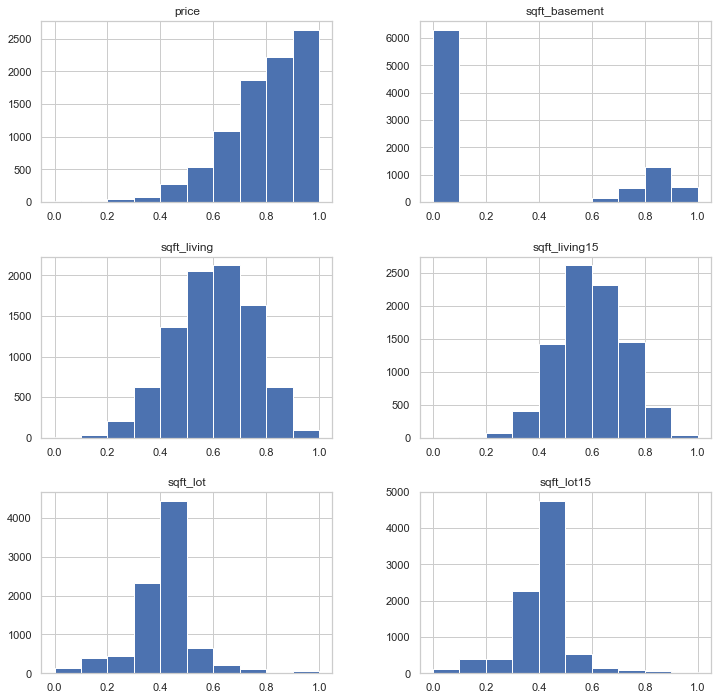

In [478]:
df['sqft_basement'] = ( sqft_basement - min(sqft_basement) ) / ( max(sqft_basement) - min(sqft_basement) )
df['sqft_lot'] = ( sqft_lot - min(sqft_lot) ) / ( max(sqft_lot) - min(sqft_lot) )
df.sqft_lot15 = ( sqft_lot15 - min(sqft_lot15) ) / ( max(sqft_lot15) - min(sqft_lot15) )
df.sqft_living=( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )
df.sqft_living15=( sqft_living15 - min(sqft_living15) ) / ( max(sqft_living15) - min(sqft_living15) )
df.price =( price - min(price)) / ( max(price) - min(price) )

df_cont=df.loc[:,['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_basement']]
df_cont.hist(figsize  = [12, 12]);

plt.show()

In [479]:
df.drop('sqft_basement', axis=1, inplace=True)

In [480]:
df_cont=df.loc[:,['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_basement']]

/Users/kaan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


## Modeling

In [489]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula = formula, data=df).fit()

#X_new = pd.DataFrame({val: [df['sqft_living'].min(), df['sqft_living'].max()]});
#preds = model.predict(X_new)

model.summary()


,sqft_living,sqft_lot,yr_renovated,sqft_living15,sqft_lot15,yr_built_0,yr_built_1,yr_built_2,yr_built_3,condition_1,...,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,bathrooms_9,bathrooms_10,bathrooms_11,bathrooms_12,bathrooms_13,bathrooms_14
0,0.497914,0.368042,0.0,0.518969,0.367689,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.314645,0.459790,0.0,0.862600,0.428181,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.658436,0.398263,0.0,0.767927,0.399688,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7,0.451871,0.455077,0.0,0.619979,0.459846,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.674407,0.412915,0.0,0.656790,0.429254,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.700151,0.392040,0.0,0.799822,0.417466,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12,0.580412,0.570380,0.0,0.656790,0.505466,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0.562010,0.454563,0.0,0.529716,0.468339,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
16,0.700151,0.514318,0.0,0.685895,0.522308,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
18,0.505129,0.457361,0.0,0.405195,0.350096,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [491]:

#est = sm.OLS(y, X).fit()
pvalues = pd.DataFrame(model.pvalues, columns=['p'])
features = list(pvalues[pvalues.p < 0.05].index)


In [492]:
outcome = 'price'

pred_sum = "+".join(features)
formula = outcome + "~" + pred_sum
model = ols(formula = formula, data=df).fit()

#X_new = pd.DataFrame({val: [df['sqft_living'].min(), df['sqft_living'].max()]});
#preds = model.predict(X_new)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     154.5
Date:                Mon, 24 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:11:47   Log-Likelihood:                 5941.6
No. Observations:                8793   AIC:                        -1.181e+04
Df Residuals:                    8757   BIC:                        -1.156e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1710      0.047      3.672      0.000       0.080       0.262
sqft_living       0.3169      0.015     21.744      0.000       0.288       0.345
sqft_lot          0.0404      0.015      2.696      0.007       0.011       0.070
yr_renovated      0.0224      0.010      2.347      0.019       0.004       0.041
sqft_living15     0.2110      0.015     14.466      0.000       0.182       0.240
yr_built_3        0.0427      0.005      9.353      0.000       0.034       0.052
condition_1       0.1050      0.030      3.522      0.000       0.047       0.163
condition_2       0.2149      0.028      7.718      0.000       0.160       0.269
condition_3       0.2336      0.028      8.373      0.000       0.179       0.288
condition_4       0.2458      0.028      8.687      0.000       0.190       0.301
zipcode_2         0.0673      0.004     16.116      0.000       0.059       0.075
zipcode_3         0.0900      0.004     21.396      0.000       0.082       0.098
zipcode_4        -0.0645      0.005    -14.266      0.000      -0.073      -0.056
long_4            0.0485      0.009      5.363      0.000       0.031       0.066
long_6            0.0571      0.062      0.922      0.357      -0.064       0.178
long_7           -0.2236      0.088     -2.545      0.011      -0.396      -0.051
long_8           -0.1659      0.034     -4.810      0.000      -0.233      -0.098
lat_0            -0.1171      0.010    -11.610      0.000      -0.137      -0.097
lat_1            -0.1383      0.006    -22.147      0.000      -0.151      -0.126
lat_2            -0.1080      0.004    -28.981      0.000      -0.115      -0.101
view_1            0.0818      0.018      4.590      0.000       0.047       0.117
view_2            0.0573      0.011      5.263      0.000       0.036       0.079
view_3            0.0869      0.018      4.751      0.000       0.051       0.123
view_4            0.1798      0.039      4.581      0.000       0.103       0.257
bathrooms_1       0.0305      0.039      0.773      0.439      -0.047       0.108
bathrooms_2       0.0479      0.036      1.338      0.181      -0.022       0.118
bathrooms_4       0.0595      0.036      1.656      0.098      -0.011       0.130
bathrooms_5       0.0818      0.036      2.282      0.023       0.012       0.152
bathrooms_6       0.0700      0.036      1.947      0.052      -0.000       0.140
bathrooms_7       0.0859      0.036      2.386      0.017       0.015       0.157
bathrooms_8       0.0827      0.036      2.303      0.021       0.012       0.153
bathrooms_9       0.0865      0.037      2.357      0.018       0.015       0.158
bathrooms_10      0.0813      0.037      2.188      0.029       0.008       0.154
bathrooms_11      0.1001      0.040      2.524      0.012       0.022       0.178
bathrooms_12      0.0895      0.041      2.168   

In [ ]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula = formula, data=df).fit()

#X_new = pd.DataFrame({val: [df['sqft_living'].min(), df['sqft_living'].max()]});
#preds = model.predict(X_new)

model.summary()

In [ ]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

y=df.price
X=df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
    
print('R^2 Score:',round(linreg.score(X, y),2))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))
print('-----------------------------------')
print('Average Predicted Price:', round(y_pred.mean(),4))
print('Average Actual Price:', round(y_test.mean(), 4))
    

In [ ]:

# This is set of function for performing linear regression and validating results
def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    # Errors
    
    # Visualization of selection of 100 house prices
    plt.figure(figsize=(16,6))
    sns.lineplot(range(len(y_pred[:200])), y_pred[:200], label='Predicted Prices')
    sns.lineplot(range(len(y_pred[:200])), y_test[:200], label='Actual Prices')
    plt.title('Comparing predicted price vs actual price', fontdict={'fontsize': 20}), plt.xlabel('Values'), plt.ylabel('Prices')
    plt.legend(), plt.show()
    return (linreg, y_pred, y_test)

def cross_validation(X, y, cv=15, show_scores=False):
    score = cross_val_score(linreg, X, y, cv=cv, scoring="r2")
    print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')
    print(score) if show_scores else False
    
def feature_selection(X, y):
    est = sm.OLS(y, X).fit()
    pvalues = pd.DataFrame(est.pvalues, columns=['p'])
    features = list(pvalues[pvalues.p < 0.05].index)
    return features


In [ ]:

X = df.drop(['price'],axis=1)
y = df.price

linreg, y_pred, y_test = linear_regression(X, y)

In [ ]:
cross_validation(X, y, cv=15, show_scores=True)

In [ ]:
significant_features = feature_selection(X, y)
print('Significant features:',len(significant_features),'\nAll features:',len(X.columns))

In [ ]:
X = df[significant_features]
y = df.price
linreg, y_pred, y_test = linear_regression(X, y)

In [ ]:

cross_validation(X, y, cv=5)

In [ ]:

features = pd.DataFrame(linreg.coef_, index=significant_features, columns=['Features'])
features.sort_values(by='Features', ascending=False).head()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y)
selector.support_ 


In [ ]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

In [ ]:
yhat = linreg.predict(X[selected_columns])

In [ ]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
r_squared

In [ ]:
adjusted_r_squared

###  SomE maps


In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.view, size=df.sqft_living, palette='tab20')
plt.xlim(-122.5, -121.8)
plt.title('Locations and Prices', fontdict={'fontsize': 20})
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.bedrooms, size=df.sqft_living, palette='tab20')
plt.xlim(-122.5, -121.7)
plt.title('Locations and Prices', fontdict={'fontsize': 20})
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.sqft_lot, size=df.sqft_lot, palette='tab20')
plt.xlim(-122.5, -121.7)
plt.title('Locations and Prices', fontdict={'fontsize': 20})
plt.show()

## Correlation Matrix

In [ ]:
"""# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()
 
# without regression
sns.pairplot(df, kind="scatter")
plot.show()"""
